<a href="https://colab.research.google.com/github/BragatteMAS/BioinfoEstrutural/blob/master/COVID19/Research/COVID19_Cases_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


## Instalando pacotes não padrões


In [ ]:
!pip install bar_chart_race

     |████████████████████████████████| 163kB 2.7MB/s 


In [ ]:
!pip install watermark

## Pacotes


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr  #precisa programa FFMPEG para rodar

### Checando versões

In [ ]:
import watermark
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [ ]:
%watermark -n -v -m -g -iv

bar_chart_race 0.1.0
numpy          1.18.5
seaborn        0.10.1
watermark      2.0.2
pandas         1.0.4
Thu Jun 18 2020 

CPython 3.6.9
IPython 5.5.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.104+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   :


## Carregando dataset

In [ ]:
from google.colab import files
pd.set_option('display.max_columns', None)
uploaded = files.upload() #selecionar arquivo no pc e editar o nome do arquivo

Saving COVID_Angel - Bar_Chart_Race_tab.csv to COVID_Angel - Bar_Chart_Race_tab.csv


In [ ]:
df = pd.read_csv('COVID_Angel - Bar_Chart_Race_tab.csv') 
#pd.options.display.float_format = '{:,.0f}'.format
df.tail(3)

Data  Dia_da_Pandemia  Argentina  Belgica  Franca  Italia  Portugal  \
85  2020-06-04               86      13920    47334  111821  192994     31007   
86  2020-06-05               87      14689    47859  112606  195351     31292   
87  2020-06-06               88      15406    48519  114657  197675     31596   

    Espanha  Reino_Unido  Brasil  
85   209910       143464  291579  
86   211570       148377  310087  
87   213095       152840  330890

### Avaliando dataset

In [ ]:
#verificando colunas
df.columns

Index(['Data', 'Dia_da_Pandemia', 'Argentina', 'Belgica', 'Franca', 'Italia',
       'Portugal', 'Espanha', 'Reino_Unido', 'Brasil'],
      dtype='object')

In [ ]:
#verificando tipos de dados
df.dtypes

Data               object
Dia_da_Pandemia     int64
Argentina           int64
Belgica             int64
Franca              int64
Italia              int64
Portugal            int64
Espanha             int64
Reino_Unido         int64
Brasil              int64
dtype: object

In [ ]:
# verificando se há arquivos do tipo null (vazio)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data             88 non-null     object
 1   Dia_da_Pandemia  88 non-null     int64 
 2   Argentina        88 non-null     int64 
 3   Belgica          88 non-null     int64 
 4   Franca           88 non-null     int64 
 5   Italia           88 non-null     int64 
 6   Portugal         88 non-null     int64 
 7   Espanha          88 non-null     int64 
 8   Reino_Unido      88 non-null     int64 
 9   Brasil           88 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 7.0+ KB


In [ ]:
#simples verificação enaltecendo linha do dataframe
df.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'red'),('color','white')]}])

In [ ]:
#mapa de calor sobre a tabela mostrando dos mais frios para os mais quentes em valor absoluto
df.style.background_gradient(cmap='coolwarm')

# Bar Chart race

## Processando dados



In [ ]:
#Transformando dias da pandemia no index
df_paises = df.set_index('Data').T
df_paises.tail(3)

Data         2020-03-11  2020-03-12  2020-03-13  2020-03-14  2020-03-15  \
Espanha               1           1           1           1           1   
Reino_Unido           2           2           2           2           2   
Brasil                1           1           1           1           2   

Data         2020-03-16  2020-03-17  2020-03-18  2020-03-19  2020-03-20  \
Espanha               1           1           1           1           2   
Reino_Unido           2           2           3           3           4   
Brasil                2           2           2           3           8   

Data         2020-03-21  2020-03-22  2020-03-23  2020-03-24  2020-03-25  \
Espanha               2           2           2           2           2   
Reino_Unido           4           8           8           9           9   
Brasil               13          13          25          25          34   

Data         2020-03-26  2020-03-27  2020-03-28  2020-03-29  2020-03-30  \
Espanha               2           2           2           2           2   
Reino_Unido           9           9           9           9           9   
Brasil               52          77          98         121         200   

Data         2020-03-31  2020-04-01  2020-04-02  2020-04-03  2020-04-04  \
Espanha               2           2           2           2           3   
Reino_Unido           9           9           9           9          13   
Brasil              234         291         428         621         904   

Data         2020-04-05  2020-04-06  2020-04-07  2020-04-08  2020-04-09  \
Espanha               9          17          35          54          82   
Reino_Unido          13          13          13          16          18   
Brasil             1128        1546        1891        2201        2433   

Data         2020-04-10  2020-04-11  2020-04-12  2020-04-13  2020-04-14  \
Espanha             136         192         267         348         531   
Reino_Unido          23          36          40          51          85   
Brasil             2915        3417        3904        4256        4579   

Data         2020-04-15  2020-04-16  2020-04-17  2020-04-18  2020-04-19  \
Espanha             764        1094        1527        2299        3274   
Reino_Unido         115         163         206         273         321   
Brasil             5717        6836        7910        9056       10278   

Data         2020-04-20  2020-04-21  2020-04-22  2020-04-23  2020-04-24  \
Espanha            4427        5958        7641        9785       11491   
Reino_Unido         373         456         590         707        1140   
Brasil            11130       12056       13717       15927       17857   

Data         2020-04-25  2020-04-26  2020-04-27  2020-04-28  2020-04-29  \
Espanha           13994       17688       21735       26304       31750   
Reino_Unido        1391        1543        1950        2630        3277   
Brasil            19638       20727       22169       23430       25262   

Data         2020-04-30  2020-05-01  2020-05-02  2020-05-03  2020-05-04  \
Espanha           36616       41262       48953       57506       66460   
Reino_Unido        3983        5018        5683        6650        8077   
Brasil            28320       30425       33682       36599       38654   

Data         2020-05-05  2020-05-06  2020-05-07  2020-05-08  2020-05-09  \
Espanha           75641       83885       90309       96122      104267   
Reino_Unido        9529       11658       14543       17089       19522   
Brasil            40581       43079       45757       49492       52995   

Data         2020-05-10  2020-05-11  2020-05-12  2020-05-13  2020-05-14  \
Espanha          111680      119263      126535      133198      138731   
Reino_Unido       22141       25150       29474       33718       38168   
Brasil            58509       61888       66501       71886       78162   

Data         2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
Espanha     

In [ ]:
#dando nome ao index para chamar no bar chart
df_paises.index.name

In [ ]:
#checando se nome ficou correto
df_paises.index.name = 'Paises'
df_paises.head(3)

Data             2020-03-11  2020-03-12  2020-03-13  2020-03-14  2020-03-15  \
Paises                                                                        
Dia_da_Pandemia           1           2           3           4           5   
Argentina                 1           1           2           2           8   
Belgica                   1           1           1           1           1   

Data             2020-03-16  2020-03-17  2020-03-18  2020-03-19  2020-03-20  \
Paises                                                                        
Dia_da_Pandemia           6           7           8           9          10   
Argentina                 9          12          19          31          31   
Belgica                   1           1           1           1           1   

Data             2020-03-21  2020-03-22  2020-03-23  2020-03-24  2020-03-25  \
Paises                                                                        
Dia_da_Pandemia          11          12          13          14          15   
Argentina                34          45          56          65          79   
Belgica                   1           1           1           1           1   

Data             2020-03-26  2020-03-27  2020-03-28  2020-03-29  2020-03-30  \
Paises                                                                        
Dia_da_Pandemia          16          17          18          19          20   
Argentina                97         128         158         225         266   
Belgica                   1           1           1           1           1   

Data             2020-03-31  2020-04-01  2020-04-02  2020-04-03  2020-04-04  \
Paises                                                                        
Dia_da_Pandemia          21          22          23          24          25   
Argentina               301         387         502         589         690   
Belgica                   1           1           1           1           1   

Data             2020-04-05  2020-04-06  2020-04-07  2020-04-08  2020-04-09  \
Paises                                                                        
Dia_da_Pandemia          26          27          28          29          30   
Argentina               745         820         966         966        1133   
Belgica                   1           1           2           8          13   

Data             2020-04-10  2020-04-11  2020-04-12  2020-04-13  2020-04-14  \
Paises                                                                        
Dia_da_Pandemia          31          32          33          34          35   
Argentina              1133        1265        1451        1554        1628   
Belgica                  23          50         109         169         200   

Data             2020-04-15  2020-04-16  2020-04-17  2020-04-18  2020-04-19  \
Paises                                                                        
Dia_da_Pandemia          36          37          38          39          40   
Argentina              1715        1795        1894        1975        2137   
Belgica                 239         267         314         399         559   

Data             2020-04-20  2020-04-21  2020-04-22  2020-04-23  2020-04-24  \
Paises                                                                        
Dia_da_Pandemia          41          42          43          44          45   
Argentina              2203        2272        2432        2432        2560   
Belgica                 689         886        1085        1243        1486   

Data             2020-04-25  2020-04-26  2020-04-27  2020-04-28  2020-04-29  \
Paises                                                                        
Dia_da_Pandemia          46          47          48          49          50   
Argentina              2658        2828        2930        3020        3132   
Belgica                1795        2257        2815        3401        3743   

Data             2020-04-30  2020-05-01 

In [ ]:
# Transpondo tabela
dfe_paises = df_paises.T
dfe_paises

Paises      Dia_da_Pandemia  Argentina  Belgica  Franca  Italia  Portugal  \
Data                                                                        
2020-03-11                1          1        1       3       3         2   
2020-03-12                2          1        1       3       3         4   
2020-03-13                3          2        1       3       3         5   
2020-03-14                4          2        1       3       3         9   
2020-03-15                5          8        1       4       3        13   
...                     ...        ...      ...     ...     ...       ...   
2020-06-02               84      12615    46134  108847  187327     30623   
2020-06-03               85      13215    46687  109252  189973     30788   
2020-06-04               86      13920    47334  111821  192994     31007   
2020-06-05               87      14689    47859  112606  195351     31292   
2020-06-06               88      15406    48519  114657  197675     31596   

Paises      Espanha  Reino_Unido  Brasil  
Data                                      
2020-03-11        1            2       1  
2020-03-12        1            2       1  
2020-03-13        1            2       1  
2020-03-14        1            2       1  
2020-03-15        1            2       2  
...             ...          ...     ...  
2020-06-02   205763       133495  254220  
2020-06-03   208269       138078  271628  
2020-06-04   209910       143464  291579  
2020-06-05   211570       148377  310087  
2020-06-06   213095       152840  330890  

[88 rows x 9 columns]

## Gráfico de corrida de barras (Bar Chart Race) 

In [ ]:
#import bar_chart_race as bcr - esta versão com a tabela dias da pandemia (uma possibilidade se queres enfatizar o fato))
bcr.bar_chart_race(dfe_paises,bar_kwargs={'alpha':.2, 'ec': 'black', 'lw':3})

In [ ]:
#salvando arquivo HTML
bcr_html_paises = bcr.bar_chart_race(dfe_paises,bar_kwargs={'alpha':.2, 'ec': 'black', 'lw':3}, filename='Casos_Paises_Dias.html')

In [ ]:
#tabela sem dias da pandemia
paises = dfe_paises.drop(columns =  'Dia_da_Pandemia')
paises

Paises      Argentina  Belgica  Franca  Italia  Portugal  Espanha  \
Data                                                                
2020-03-11          1        1       3       3         2        1   
2020-03-12          1        1       3       3         4        1   
2020-03-13          2        1       3       3         5        1   
2020-03-14          2        1       3       3         9        1   
2020-03-15          8        1       4       3        13        1   
...               ...      ...     ...     ...       ...      ...   
2020-06-02      12615    46134  108847  187327     30623   205763   
2020-06-03      13215    46687  109252  189973     30788   208269   
2020-06-04      13920    47334  111821  192994     31007   209910   
2020-06-05      14689    47859  112606  195351     31292   211570   
2020-06-06      15406    48519  114657  197675     31596   213095   

Paises      Reino_Unido  Brasil  
Data                             
2020-03-11            2       1  
2020-03-12            2       1  
2020-03-13            2       1  
2020-03-14            2       1  
2020-03-15            2       2  
...                 ...     ...  
2020-06-02       133495  254220  
2020-06-03       138078  271628  
2020-06-04       143464  291579  
2020-06-05       148377  310087  
2020-06-06       152840  330890  

[88 rows x 8 columns]

In [ ]:
#chart da tabela sem dias da pandemia
bcr.bar_chart_race(paises)

In [ ]:
bcr_html_paises_2 = bcr.bar_chart_race(paises, filename='Casos_Paises.html')

# Plots


## Carregando segunda aba da tabela editada para plots

In [ ]:
# COVID_Angel - Plots_tab.csv selecionar este arquivo no computador
uploaded = files.upload() 

Saving COVID_Angel - Plots_tab.csv to COVID_Angel - Plots_tab.csv


In [ ]:
df2 = pd.read_csv('COVID_Angel - Plots_tab.csv') 
df2

Data  Dia_da_Pandemia  Argentina  Belgica  Franca  Italia  Portugal  \
0   11-3                1          1        1       3       3         2   
1   12-3                2          1        1       3       3         4   
2   13-3                3          2        1       3       3         5   
3   14-3                4          2        1       3       3         9   
4   15-3                5          8        1       4       3        13   
..   ...              ...        ...      ...     ...     ...       ...   
83  02-6               84      12615    46134  108847  187327     30623   
84  03-6               85      13215    46687  109252  189973     30788   
85  04-6               86      13920    47334  111821  192994     31007   
86  05-6               87      14689    47859  112606  195351     31292   
87  06-6               88      15406    48519  114657  197675     31596   

    Espanha  Reino_Unido  Brasil  
0         1            2       1  
1         1            2       1  
2         1            2       1  
3         1            2       1  
4         1            2       2  
..      ...          ...     ...  
83   205763       133495  254220  
84   208269       138078  271628  
85   209910       143464  291579  
86   211570       148377  310087  
87   213095       152840  330890  

[88 rows x 10 columns]

## Seaborn


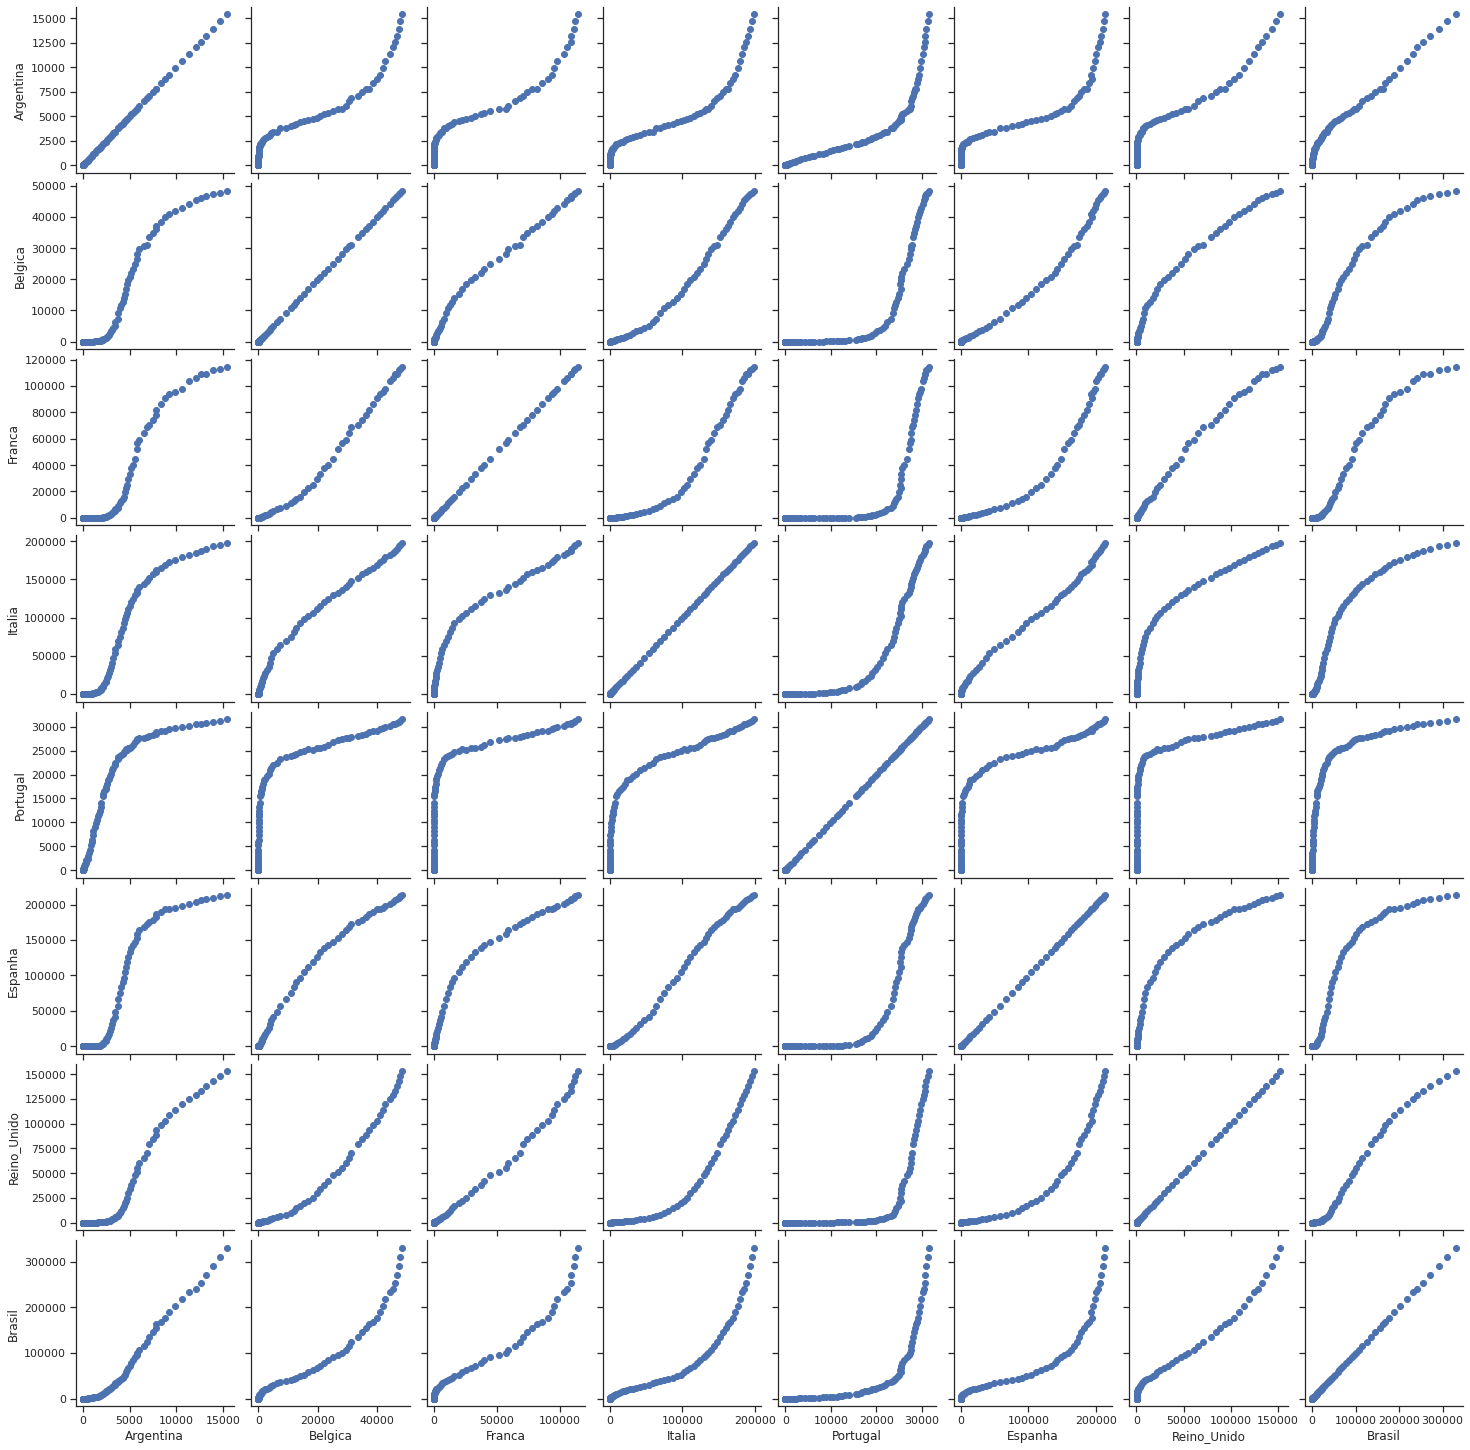

In [ ]:
g = sns.PairGrid(paises)
g.map(plt.scatter);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:100: UserWarning:

The handle <matplotlib.patches.Patch object at 0x7f7b7c840400> has a label of '_nolegend_' which cannot be automatically added to the legend.



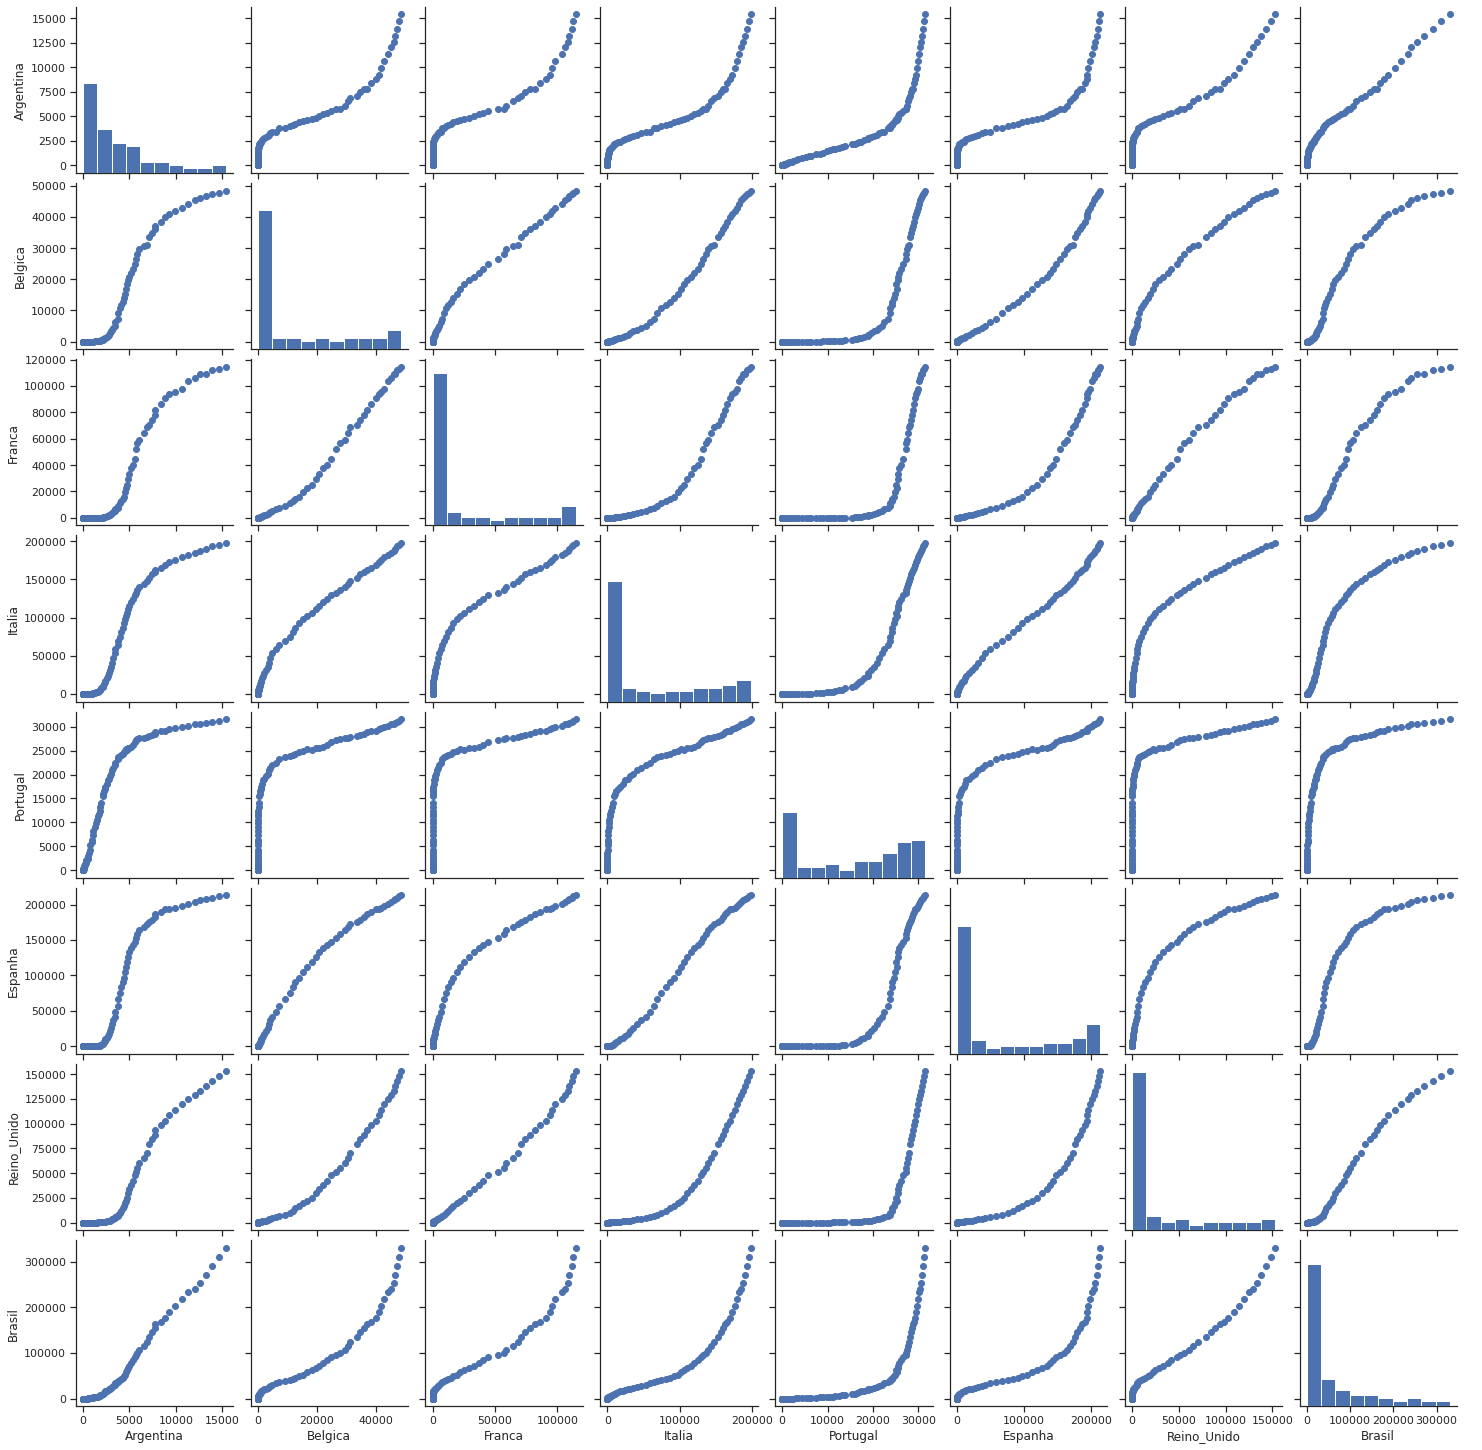

In [ ]:
g = sns.PairGrid(paises)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

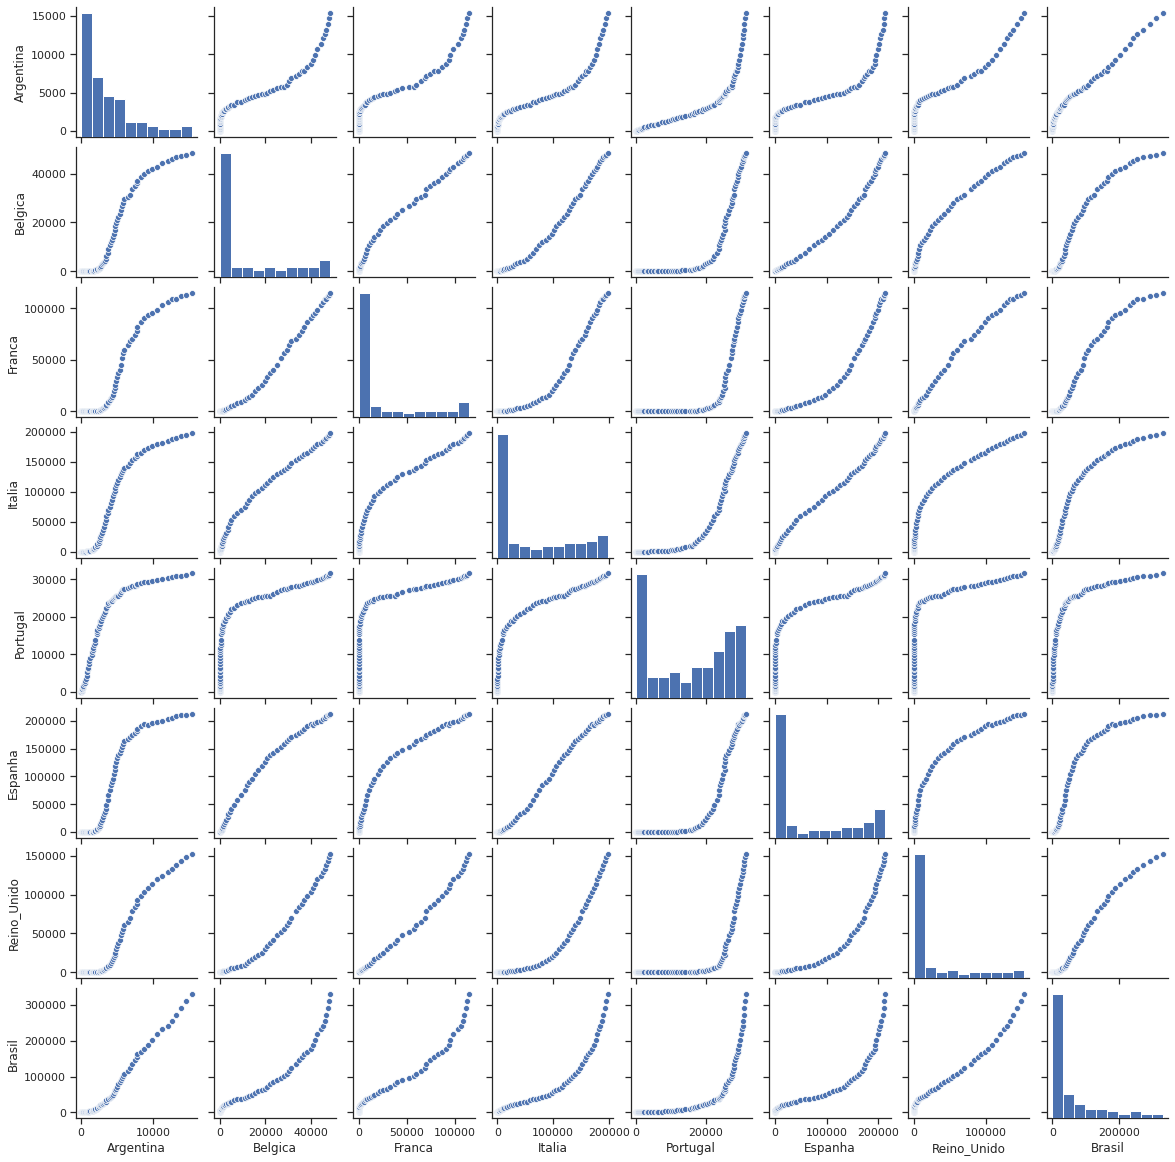

In [ ]:
sns.pairplot(paises, height=2);

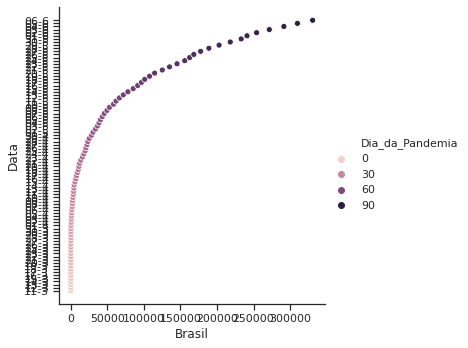

In [ ]:
sns.relplot(x='Brasil', y='Data', hue = "Dia_da_Pandemia", data=df2);

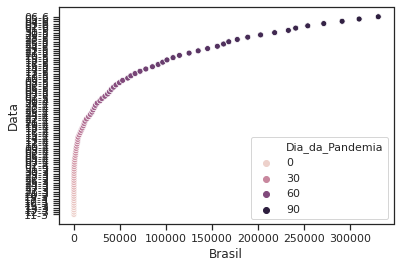

In [ ]:
#Aqui trocando o nome do pais tem novos gráficos, pode ser editado a coluna data para melhorar a viz
sns.scatterplot(x='Brasil', y='Data', hue = "Dia_da_Pandemia", data=df2);

## Plotly

In [ ]:
df

Data  Dia_da_Pandemia  Argentina  Belgica  Franca  Italia  Portugal  \
0   11-3                1          1        1       3       3         2   
1   12-3                2          1        1       3       3         4   
2   13-3                3          2        1       3       3         5   
3   14-3                4          2        1       3       3         9   
4   15-3                5          8        1       4       3        13   
..   ...              ...        ...      ...     ...     ...       ...   
83  02-6               84      12615    46134  108847  187327     30623   
84  03-6               85      13215    46687  109252  189973     30788   
85  04-6               86      13920    47334  111821  192994     31007   
86  05-6               87      14689    47859  112606  195351     31292   
87  06-6               88      15406    48519  114657  197675     31596   

    Espanha  Reino_Unido  Brasil  
0         1            2       1  
1         1            2       1  
2         1            2       1  
3         1            2       1  
4         1            2       2  
..      ...          ...     ...  
83   205763       133495  254220  
84   208269       138078  271628  
85   209910       143464  291579  
86   211570       148377  310087  
87   213095       152840  330890  

[88 rows x 10 columns]

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Brasil", y='Data', color='Dia_da_Pandemia', size='Brasil' )
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Data, y=df.Brasil,name='Brasil'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Argentina, name='Argentina'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Belgica, name='Bélgica'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Franca, name='França'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Italia, name='Itália'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Portugal, name='Portugal'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Espanha, name = 'Espanha'))
fig.add_trace(go.Scatter(x=df.Data, y=df.Reino_Unido, name= 'Reino Unido'))
fig.show()